<a href="https://colab.research.google.com/github/mggozzi/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [2]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 8.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [4]:
#loading the data
df1 = pd.read_csv('./assignment3/data/car_data.csv')

In [ ]:
#head
df1.head()

In [ ]:
#dimensions
df1.columns

In [ ]:
#summarizing the variables
df1.describe()

In [ ]:
#checking for missings in gender
df1['Gender'].value_counts()
#nothing is missing!

In [ ]:
#making the gender dummy
df1['genderDummy'] = 0
df1.loc[df1['Gender']=='Female', 'genderDummy'] = 1

#making sure it worked
df1['genderDummy'].value_counts()

In [23]:
#making a matrix
vars = ['Age', 'AnnualSalary']
X = df1.loc[:, vars]
y = df1['Purchased']

In [ ]:
#maxmin normalizing age and annualsalary

def maxmin(x): #function from notes
  x = (x-min(x))/(max(x)-min(x))
  return x

X = X.apply(maxmin)
X.describe()

In [55]:
# spliting into training and testing, need to import from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
#finding the optimal k (from KNN notes)
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE == SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

#plotting to see the optimal k
plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#optimal k is seems to be 10

In [ ]:
#part 6, confusion matrix
model = KNeighborsClassifier(n_neighbors=9) # creating model
fitted_model = model.fit(X_train,y_train) # training model
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)

#this is mostly accurate:
# 104/107 of the 0's go to 0, and 78/93 1's go to 1's
#that's a total of 182 / 200, or 0.91 / 91% accuracy rate

In [60]:
#part 7, separately for m and f
# need to resplit the the data (including Gender)
from sklearn.model_selection import train_test_split
vars = ['Age', 'AnnualSalary', 'Gender']
X = df1.loc[:, vars]
y = df1['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

model = KNeighborsClassifier(n_neighbors = 10)
fitted_model = model.fit(X_train.drop('Gender', axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender', axis=1))

#splitting male and female
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [ ]:
pd.crosstab(y_F, y_hat_F)

#a total of 91/105 predictions were correct for women
# this is equivalent to about 87% accuracy
#this model appears to be more accurate in predicting female customer purchases
# the difference is approximately 6%, which may not seem like a lot, but
# it still represents a difference in prediction accuracy that could be reduced

In [ ]:
pd.crosstab(y_M, y_hat_M)

#a total of 77/95 predictions were correct for men
# this is equivalent to 81% accuracy

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [4]:
#loading the data
df2 = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

#dropping the other variables
keep = ['price', 'mileage', 'year']
clean_df = df2.filter(keep)

In [ ]:
#head
clean_df.head()

In [ ]:
#describe
clean_df.describe()
#no nans?

In [7]:
# maxmin function
def maxmin(x): #function from notes
  x = (x-min(x))/(max(x)-min(x))
  return x

In [ ]:
# maxmin normalizing year and mileage
y=clean_df['price']
X = clean_df.loc[:,['year','mileage']] #matrix
X = X.apply(maxmin)
X.describe()

In [9]:
#splitting into 80 / 20 training and eval
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [10]:
#using the KNN algorithm for regression
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

In [ ]:
#SSE and optimal k
k_bar = 60
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test==SSE_min)
k_star = k_grid[min_index]
print(k_star) #optimal k --> answer to part 5 of question

In [12]:
#function to make the plots

def cars(k,data=clean_df):
    y = clean_df['price'] # putting this into the function
    X = clean_df.loc[:,['year','mileage']] # this one too

    #Normalize:
    X = X.apply(maxmin)
    model = kNNRegression(n_neighbors=k)
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100
    N_y = 100
    total = N_x*N_y
    grid_x = np.linspace(0,1,N_x)
    grid_y = np.linspace(0,1,N_y)
    xs, ys = np.meshgrid(grid_x,grid_y)
    X = xs.reshape(total)
    Y = ys.reshape(total)
    x_hat = pd.DataFrame({'year':X,'mileage':Y})
    y_hat = fitted_model.predict(x_hat)
    x_hat['predicted_price'] = y_hat
    this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',hue='predicted_price')
    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

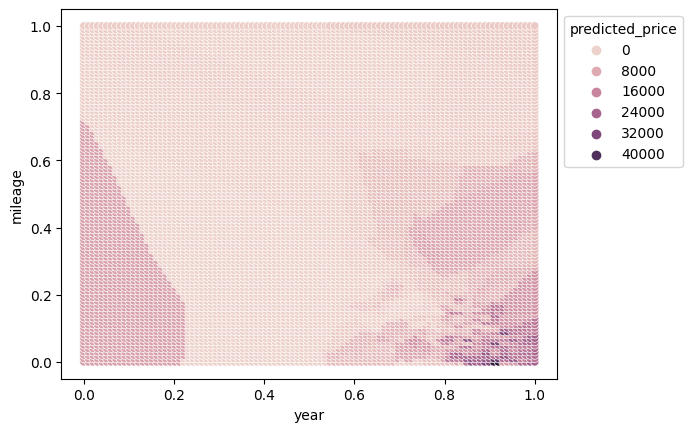

In [13]:
#k=3
cars(3, clean_df)

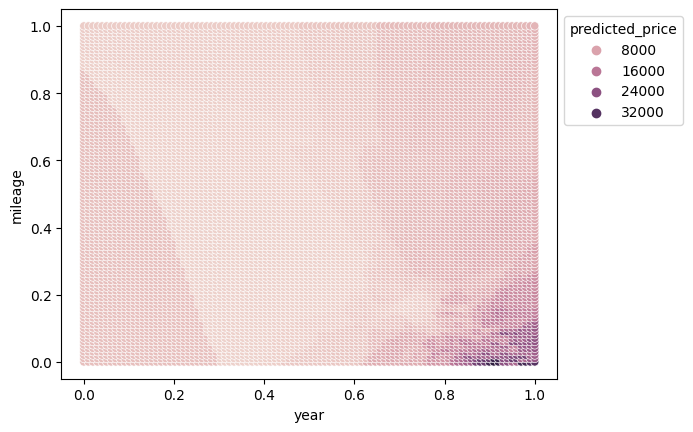

In [14]:
#k=10
cars(10, clean_df)

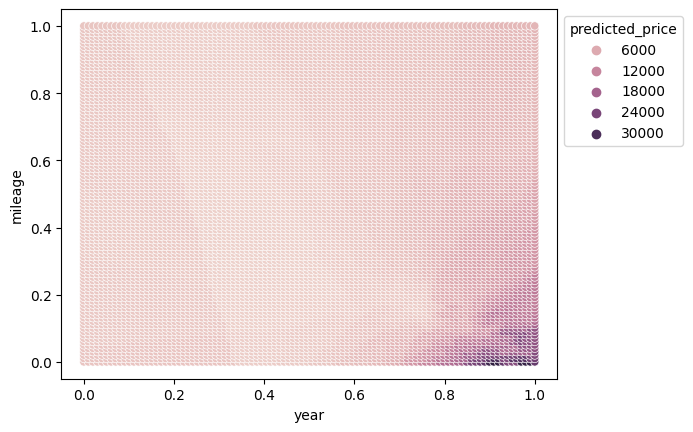

In [15]:
#k=25
cars(25, clean_df)

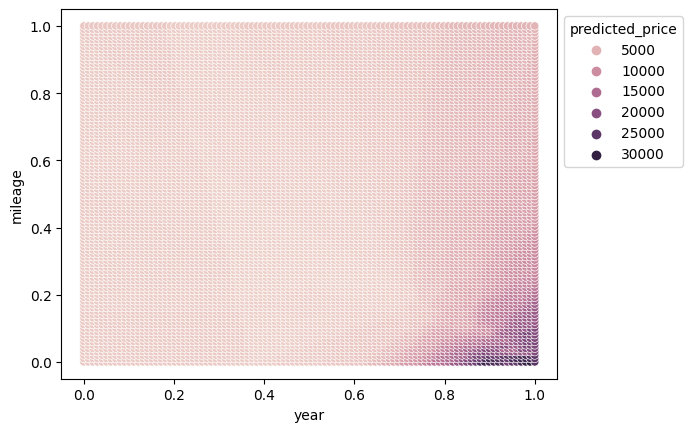

In [16]:
#k=50
cars(50, clean_df)

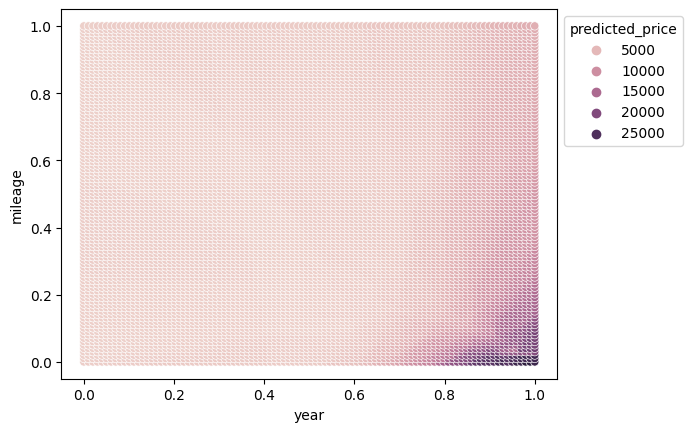

In [17]:
#k=100
cars(100, clean_df)

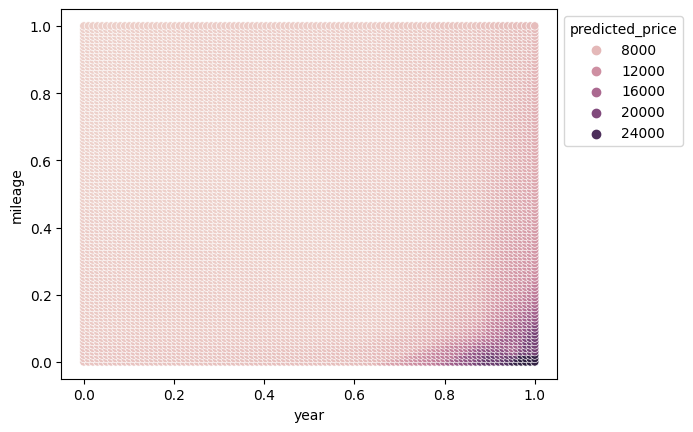

In [18]:
#k=300
cars(300, clean_df)

#as k increases past k=50, the data seems less and less helpful
#the colors are all blurred together, and it is hard to draw any substantial conclusions
# the predicted_price value ranges / bins? also changed with each different value of k

Part 6: Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account.

Answer: I determined the optimal k to be 54.  For this reason, the k=50 scatterplot is likely the most accurate representation.  As the k value increased, the scatterplots became less definitive / decipherable / meaningful.  The k=3, k=10, and k=25 scatterplots are examples of underfitting.  The lower k values do not allow for enough model complexity to accurately describe the relationship between variables.  On the other hand, the higher k values (100 and 300) are examples of overfitting.  These k values are too high, and make the model too complex to be helpful in drawing any conclusions about variable relationships.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
# running the code

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [ ]:
#scatter plot 1 --> 0.125
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#scatterplot 2 --> 0.25
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#scatterplot 3 --> 0.5
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#scatterplot 4 --> 1.0
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#scatterplot 5 --> 2.0
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

Question 2: As the noise increases, the visual distinctness of the clusters decreases.  The points in each group become less tightly grouped together, 'bleeding' into each other.

In [ ]:
# Part 3 --> the scree plots

def maxmin(x): # the max-min scalar function
    x = (x-min(x))/(max(x)-min(x))
    return x

In [ ]:
def scree(data): # function to make scree plots from notes

  X = data.loc[ : , ['x1','x2'] ] # selecting data
  X = X.apply(maxmin) # normalizing

  #  making the scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # range of k's
  SSE = np.zeros(k_bar) # training error
  for k in range(k_bar): # for indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # create model for k
    model = model.fit(X) # fitting emodel
    SSE[k] = model.inertia_ # recording  sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  scree_plot1 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot


In [ ]:
#scree plot 1 --> 0.125
scree(df0_125)
#elbow clear at k=3

In [ ]:
#scree plot 2 --> 0.25
scree (df0_25)
#elbow clear at k=3

In [ ]:
#scree plot 3 --> 0.5
scree (df0_5)
#elbow less clear, but still identifiable at k=3

In [ ]:
#scree plot 4 --> 1.0
scree (df1_0)
#elbow not clearly identifiable, probably either k=2 or k=3

In [ ]:
#scree plot 5 --> 2.0
scree (df2_0)
#elbow not identifiable / unclear

Question 4: In this example, increasing noise resulted in increased 'blur' between cluster groups.  When the noise was 0.125, it was very obvious which points were in which cluster.  When the noise was 2.0, it was much harder because of the large degree of overlap.  When the groups were more distinct (lower noise), the scree plot was very helpful in identifying k with the presense of a clear elbow.  The scree plot was less beneficial when the groups were less distinct (higher noise), because the elbow was not clearly identifiable.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?